In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()
print(most_recent_date)

#Alternate method
alt_most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(alt_most_recent_date)

2017-08-23
('2017-08-23',)


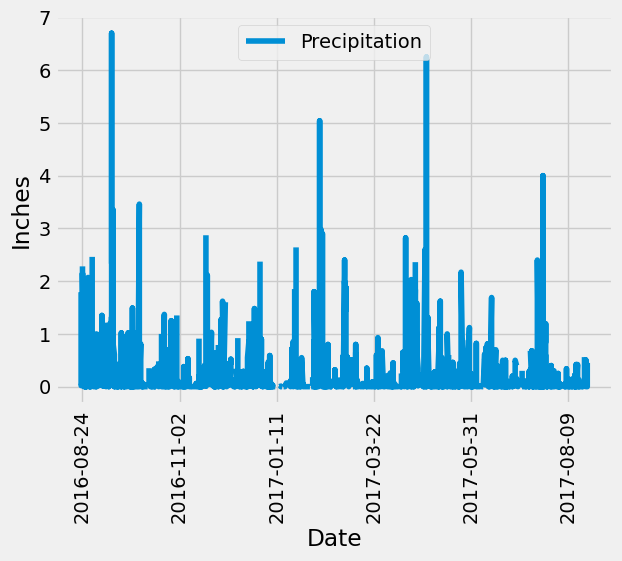

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

latest_data = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.

past_year = session.query(func.date(func.max(measurement.date), '-1 year')).scalar()

# Perform a query to retrieve the data and precipitation scores

results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= past_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(results, columns= ['Date', 'Precipitation'])

# Sort the dataframe by date

df.sort_values(by=['Date'],inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Precipitation'], label='Precipitation')

# Set x-axis major locator to display 5 or 6 ticks
ax.xaxis.set_major_locator(mdates.DayLocator(interval=70))


# Rotate date labels for better readability
plt.xticks(rotation=90)

# Adding labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
ax.legend(loc='upper center')

plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.station).count()
print(total_stations)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(most_active_station)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_act_data = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(most_act_data)

[(54.0, 85.0, 71.66378066378067)]


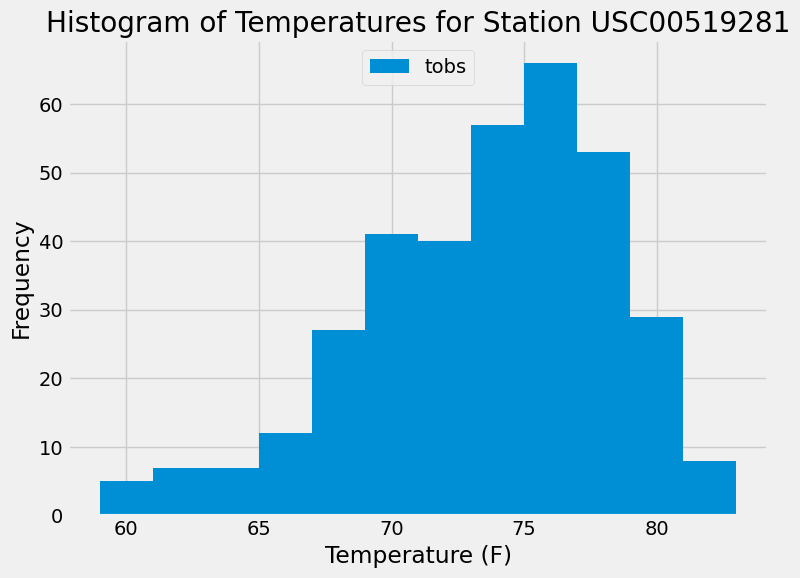

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_temp = session.query(measurement.tobs).\
    filter(measurement.date >= past_year).\
    filter(measurement.station=='USC00519281').all()

# using list comprehension to generate list of temperatures for histogram
temperatures = [temp[0] for temp in last_12_temp]

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, label='tobs')  
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperatures for Station USC00519281')
plt.grid(True)
plt.legend(loc='upper center')
plt.tight_layout()

plt.show()

# Close Session

In [16]:
# Close Session
session.close()